<a href="https://colab.research.google.com/github/VivekKamisetty/cs666student/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.signal import find_peaks

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Task 1 (10pts): Install the BioSPPY library with the following code.
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.5 MB/s eta 0:00:00


In [5]:
#Task 2 (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.
from biosppy import storage
from biosppy.signals import ecg
signal, metadata = storage.load_txt('ecg.txt')

In [6]:
#Task 3 (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.
SAMPLING_RATE = 1000 # the number of samples of an audio signal taken per second
number_of_samples = len(signal)
SECONDS = number_of_samples/SAMPLING_RATE #len(signal) = 15000; SECONDS = 15

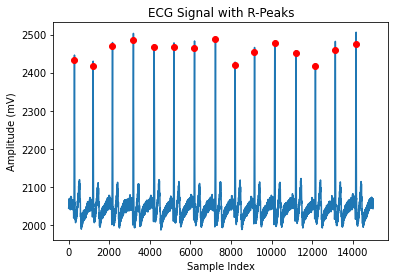

In [7]:
#Task 4 (20 pts): Process the signal with BioSPPY using the ecg.ecg method.
from biosppy import storage
from biosppy.signals import ecg
import biosppy

out = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

# Extracting R-peak locations
rpeaks = out['rpeaks']

# Ploting original ECG signal and R-peaks
plt.figure()
plt.plot(signal)
plt.plot(rpeaks, signal[rpeaks], 'ro')
plt.title('ECG Signal with R-Peaks')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (mV)')
plt.show()

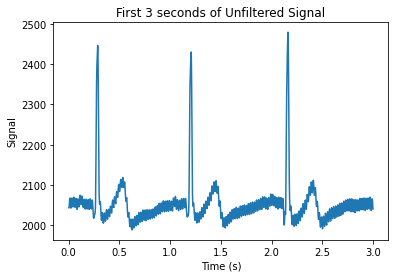

In [8]:
# Task 5 (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal.
number_of_samples = 3000
signal_3_seconds = signal[:number_of_samples] # Extract the first 3 seconds worth of samples from the signal array
time = [i / SAMPLING_RATE for i in range(number_of_samples)]

# Ploting the first 3 seconds of the signal
plt.plot(time, signal_3_seconds)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('First 3 seconds of Unfiltered Signal')
plt.show()

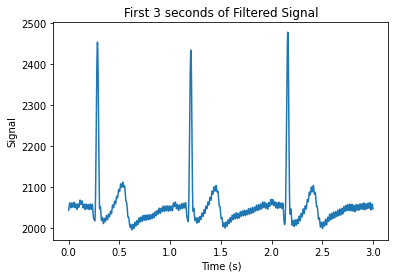

In [9]:
#Plot the first 3 seconds of the filtered signal.
# Define the filter parameters
cutoff_frequency = 50
filter_order = 5

# Designing a Butterworth filter
b, a = butter(filter_order, cutoff_frequency / (SAMPLING_RATE / 2), btype='low')

# Applying the filter to the signal
filtered_signal5 = filtfilt(b, a, signal)

# Extracting the first 3 seconds worth of filtered samples from the signal array
filtered_signal_3_seconds = filtered_signal5[:number_of_samples]

# Generating time samples for the first 3 seconds of the filtered signal
time1 = [i / SAMPLING_RATE for i in range(number_of_samples)]

# Ploting the first 3 seconds of the filtered signal
plt.plot(time1, filtered_signal_3_seconds)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('First 3 seconds of Filtered Signal')
plt.show()

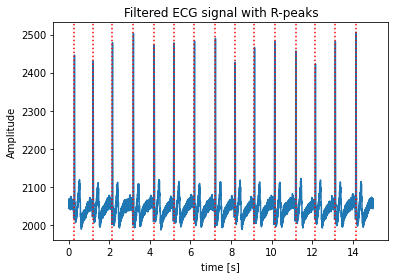

In [10]:
#Task 6 (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use plt.axvline(x = 100, color = 'r', ls=':') to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.
out = biosppy.signals.ecg.ecg(signal=filtered_signal5, sampling_rate=SAMPLING_RATE, show=False)

# extracting the R-peak locations
rpeaks = out['rpeaks']

# creating a time axis for the signal
time = np.arange(len(signal)) / SAMPLING_RATE

# ploting the ECG signal
plt.plot(time, signal)

# marking the R-peaks with vertical lines
for rpeak in rpeaks:
    plt.axvline(x=rpeak / SAMPLING_RATE, color='r', ls=':')

# labeling the x-axis as 'time [s]'
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.title("Filtered ECG signal with R-peaks")
plt.show()



In [11]:
#Task 7 (5 pts): Let's install the NeuroKit2 library.
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


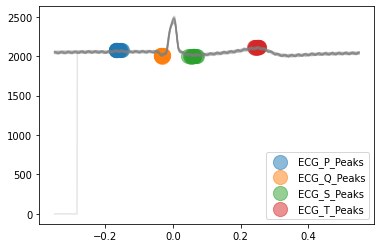

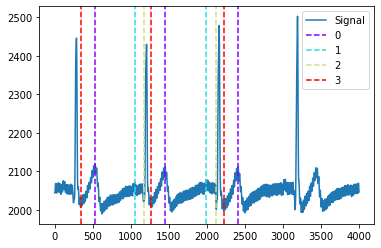

In [12]:
#Task 8 (20 pts): Detect P Q S T Peaks using Neurokit.
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], signal[:4000])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


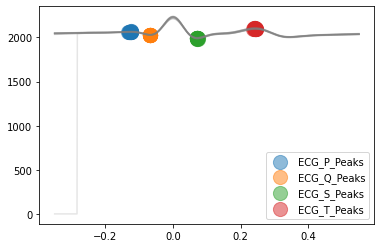

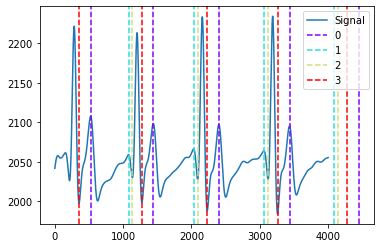

In [14]:
#Bonus Task (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.
filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut = 10, method='butterworth', order=4)
_, waves_peak = nk.ecg_delineate(filtered_signal, rpeaks, sampling_rate=1000, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5], 
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], filtered_signal[:4000])


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


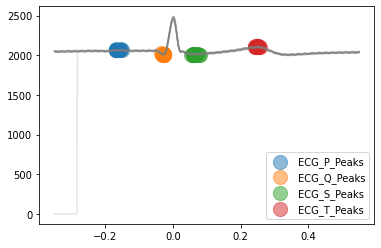

In [27]:
#_, waves_peak = nk.ecg_delineate(filtered_signal5, rpeaks, sampling_rate=1000, method="peak", show=True, show_types='peaks')
#plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5], 
#                       waves_peak['ECG_P_Peaks'][:5],
#                       waves_peak['ECG_Q_Peaks'][:5],
#                       waves_peak['ECG_S_Peaks'][:5]], filtered_signal5[:4000])
_, waves_peak = nk.ecg_delineate(filtered_signal5, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [20]:
# TODO Which one works the best?
# It is clear and easier to spot peaks in filtered signal than unfiltered
# The filtered signal from biosspy looks much clearer to spot the peaks